# Assignment III Daniel Chaves

Identify which classification model works the best and whether there is a considerable difference in the results. 

<AxesSubplot:xlabel='choice', ylabel='Count'>

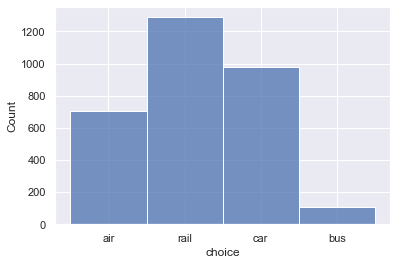

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df2['choice'])

{'C': 0.01}
Accuracy: 0.5762987012987013
Precision: [0.55244755 0.25       0.48611111 0.67193676]
Recall: [0.57246377 0.04545455 0.53299492 0.65637066]


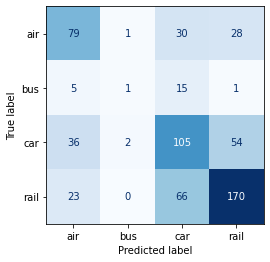

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)

##---------------------The choice of encoding method---------------------------
#(1) One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

#(2) Label Encoding
#encoder = LabelEncoder()
#df=data.copy()
#df['service_air'] = encoder.fit_transform(df['service_air'])
#df['service_rail'] = encoder.fit_transform(df['service_rail'])

#(3) Dummy Encoding
#df=data.copy()
#dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
#df = pd.concat([df, dummy_df], axis=1)
#df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

##---------------------The choice of classification model---------------------------
#(1)LR
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000,2000],}
model = LogisticRegression(max_iter=2000, random_state=0)

#(2)KNN
#params = {
#'n_neighbors': [3, 5, 7, 9],
#'weights': ['uniform', 'distance']
#}
#model=KNeighborsClassifier()

#(3)RF
#params = {
#'n_estimators': [100, 200, 300],
#'max_depth': [None, 10, 20, 30],
#'min_samples_split': [2, 5, 10],
#'min_samples_leaf': [1, 2, 4]
#}
#model = RandomForestClassifier(random_state=0)

#(4)XGBoost
#params = {
#'learning_rate': [0.01, 0.1, 0.2],
#'n_estimators': [100, 200, 300],
#'max_depth': [3, 4, 5]
#}
#map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
#y_train = y_train.map(map)
#y_test = y_test.map(map)
#model =  XGBClassifier()

#(5)SVM
## Note: It will costs a long time.
#params = {
#'C': [0.1, 1, 10],
#}


#model= SVC(kernel="linear")

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

# Results of exploring the classification models

LR:One hot encoding/{'C': 0.01}
Accuracy: 0.5762987012987013
Precision: [0.55244755 0.25       0.49056604 0.66536965]
Recall: [0.57246377 0.04545455 0.52791878 0.66023166]

LR: Label encoding/{'C': 0.1}
Accuracy: 0.5698051948051948
Precision: [0.56521739 0.25       0.48292683 0.64312268]
Recall: [0.56521739 0.04545455 0.50253807 0.66795367]

LR: Dummy Encoding/{'C': 0.01}
Accuracy: 0.5762987012987013
Precision: [0.55244755 0.25       0.49056604 0.66536965]
Recall: [0.57246377 0.04545455 0.52791878 0.66023166]

KNN: One hot encoding/ {'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.5324675324675324
Precision: [0.49710983 0.         0.4301676  0.64705882]
Recall: [0.62318841 0.         0.39086294 0.63706564]

KNN: Label encoding/{'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.5081168831168831
Precision: [0.51162791 0.11111111 0.41791045 0.58483755]
Recall: [0.47826087 0.04545455 0.42639594 0.62548263]

RF: One hot encoding/{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.5113636363636364
Precision: [0.49635036 0.25       0.4120603  0.5942029 ]
Recall: [0.49275362 0.04545455 0.41624365 0.63320463]

RF:Label encoding/{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.5162337662337663
Precision: [0.49635036 0.25       0.42156863 0.60147601]
Recall: [0.49275362 0.04545455 0.43654822 0.62934363]

XGBOOOOOOOST: One hot encoding/{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.5746753246753247
Precision: [0.57462687 0.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]

XGBOOOOOOOST: Label encoding/{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.5746753246753247
Precision: [0.57462687 0.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]

SVM: One hot encoding (37 min processing time)/{'C': 0.1}
Accuracy: 0.564935064935065
Precision: [0.54861111 0.         0.4556962  0.68510638]
Recall: [0.57246377 0.         0.54822335 0.62162162]

# Identify which model, together with its corresponding hyperparameters, gives the best performance for mode choice predictions.

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore", category=ConvergenceWarning)

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)

# Preprocessing: One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

x = df.drop(['choice', 'ID'], axis=1)
y = df['choice']

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


#(3)RF
params = {
'n_estimators': [100, 200, 300],
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier(random_state=0)

# Create a Grid Search CV object with cross-validation and scoring
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Define a RandomOverSampler to handle class imbalance
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=0)

# Create a pipeline that includes oversampling and the grid Search
pipeline = Pipeline([('oversampler', oversampler), ('grid_search', grid_search)])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Get the best estimator from grid Search
best_rf_classifier = pipeline.named_steps['grid_search'].best_estimator_

# Evaluate the model on the test data
y_pred = best_rf_classifier.predict(x_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print the best hyperparameters
print("Best Hyperparameters:", pipeline.named_steps['grid_search'].best_params_)

              precision    recall  f1-score   support

         air       0.44      0.34      0.39       138
         bus       0.07      0.59      0.13        22
         car       0.50      0.26      0.34       197
        rail       0.64      0.56      0.60       259

    accuracy                           0.42       616
   macro avg       0.41      0.44      0.36       616
weighted avg       0.53      0.42      0.45       616

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.4155844155844156
Precision: [0.44339623 0.0726257  0.49514563 0.63596491]
Recall: [0.34057971 0.59090909 0.25888325 0.55984556]


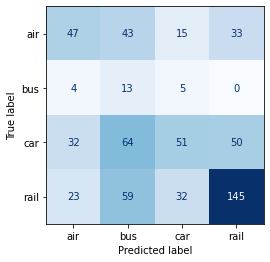

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay as cmd
print( pipeline.named_steps['grid_search'].best_params_)
print(f'Accuracy: {accuracy_score(y_test, best_rf_classifier.predict(x_test))}')
print(f'Precision: {precision_score(y_test, best_rf_classifier.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test, best_rf_classifier.predict(x_test),average=None)}')
cmd.from_estimator(pipeline, x_test, y_test,cmap='Blues',colorbar=False)

Exploring RandomSearch of the hyperparameters

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore", category=ConvergenceWarning)

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)

# Preprocessing: One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

x = df.drop(['choice', 'ID'], axis=1)
y = df['choice']

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


#(3)RF
params = {
'n_estimators': [100, 200, 300],
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier(random_state=0)

# Create a Grid Search CV object with cross-validation and scoring
random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, scoring='accuracy', random_state=0)

# Define a RandomOverSampler to handle class imbalance
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=0)

# Create a pipeline that includes oversampling and the grid Search
pipeline = Pipeline([('oversampler', oversampler), ('random_search', random_search)])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Get the best estimator from grid Search
best_rf_classifier = pipeline.named_steps['random_search'].best_estimator_

# Evaluate the model on the test data
y_pred = best_rf_classifier.predict(x_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print the best hyperparameters
print("Best Hyperparameters:", pipeline.named_steps['random_search'].best_params_)

              precision    recall  f1-score   support

         air       0.43      0.35      0.39       138
         bus       0.07      0.59      0.13        22
         car       0.50      0.26      0.34       197
        rail       0.63      0.54      0.59       259

    accuracy                           0.41       616
   macro avg       0.41      0.44      0.36       616
weighted avg       0.52      0.41      0.45       616

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30}


{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30}
Accuracy: 0.41233766233766234
Precision: [0.43243243 0.07344633 0.4952381  0.632287  ]
Recall: [0.34782609 0.59090909 0.26395939 0.54440154]


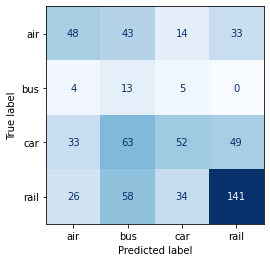

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay as cmd
print( pipeline.named_steps['random_search'].best_params_)
print(f'Accuracy: {accuracy_score(y_test, best_rf_classifier.predict(x_test))}')
print(f'Precision: {precision_score(y_test, best_rf_classifier.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test, best_rf_classifier.predict(x_test),average=None)}')
cmd.from_estimator(pipeline, x_test, y_test,cmap='Blues',colorbar=False)

Exploring XGBoost

Best Hyperparameters: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.37      0.42       138
           1       0.07      0.59      0.13        22
           2       0.50      0.26      0.34       197
           3       0.65      0.58      0.62       259

    accuracy                           0.43       616
   macro avg       0.43      0.45      0.38       616
weighted avg       0.54      0.43      0.47       616

Accuracy: 0.43344155844155846
Precision: [0.48571429 0.07428571 0.4952381  0.65367965]
Recall: [0.36956522 0.59090909 0.26395939 0.58301158]
ROC AUC Score: 0.7082338680986182


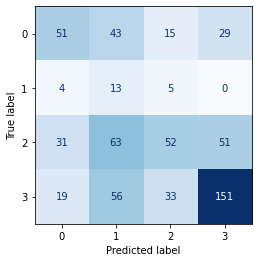

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore", category=ConvergenceWarning)

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)

# Preprocessing: One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

x = df.drop(['choice', 'ID'], axis=1)
y = df['choice']

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


#(4)XGBoost
param_dist = {
    'n_estimators': range(100, 301, 25),  
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model =  XGBClassifier()

# Create a Random Search CV object with cross-validation and scoring
random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, scoring='accuracy', random_state=0)

# Define a RandomOverSampler to handle class imbalance
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=0)

# Create a pipeline that includes oversampling and the grid Search
pipeline = Pipeline([('oversampler', oversampler), ('random_search', random_search)])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Get the best estimator from grid Search
best_rf_classifier = pipeline.named_steps['random_search'].best_estimator_

# Evaluate the model on the test data
y_pred = best_rf_classifier.predict(x_test)
y_prob = best_rf_classifier.predict_proba(x_test)  # Predict probabilities for ROC AUC score

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # 'ovr' for multiclass classification

# Print the best hyperparameters
print("Best Hyperparameters:", pipeline.named_steps['random_search'].best_params_)
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, best_rf_classifier.predict(x_test))}')
print(f'Precision: {precision_score(y_test, best_rf_classifier.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test, best_rf_classifier.predict(x_test),average=None)}')
# Print ROC AUC score
print("ROC AUC Score:", roc_auc)
cmd.from_estimator(pipeline, x_test, y_test,cmap='Blues',colorbar=False)

# Model without oversampling method

{'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01}
              precision    recall  f1-score   support

           0       0.57      0.56      0.57       138
           1       0.00      0.00      0.00        22
           2       0.48      0.54      0.51       197
           3       0.65      0.66      0.65       259

    accuracy                           0.57       616
   macro avg       0.43      0.44      0.43       616
weighted avg       0.56      0.57      0.57       616

Accuracy: 0.5746753246753247
Precision: [0.57462687 0.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\

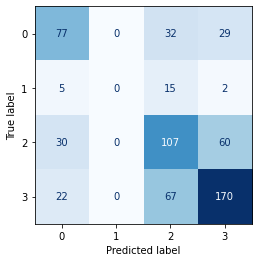

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore", category=ConvergenceWarning)

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)

# Preprocessing: One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

x = df.drop(['choice', 'ID'], axis=1)
y = df['choice']

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


#(4)XGBoost
param_dist = {
    'n_estimators': range(100, 301, 25),  
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model =  XGBClassifier()

# Create a Random Search CV object with cross-validation and scoring
random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, scoring='accuracy', random_state=0)

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
random_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = random_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = random_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the random search
model = random_search.best_estimator_

# Evaluate the model on the test data
y_pred = model.predict(x_test)

# Print classification report
print(classification_report(y_test, y_pred))

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

# Provide a reflection on the underlying reasons why certain classification models may achieve better prediction accuracy compared to others when applied to this dataset.

The choice of the best model depends on various factors, including the nature of the data, the size of the dataset, the presence of outliers, the dimensionality of the feature space, and the computational resources available. Additionally, hyperparameter tuning and feature engineering can significantly impact model performance.

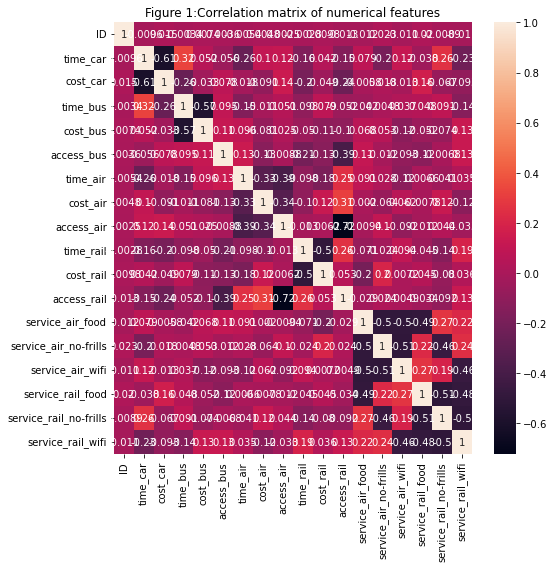

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(8,8))

corr = df.corr()
sns.heatmap(corr, annot = True)

plt.title("Figure 1:Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

# What would you suggest doing to improve the prediction accuracy of the developed classification models (any opinion about the dataset?). 

Use the oversampling method to correct for imbalance or any other similar method. Also remove outliers could help